In [1]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')


In [2]:
import pandas as pd
import numpy as np
import os
from os.path import join, isdir, dirname, basename, exists
from os import mkdir
#import nibabel as nib
import glob as glob
import matplotlib.pyplot as plt
import seaborn as sns; sns.set(context="paper",style="white",font_scale=1.5)

In [13]:
CON = '/data/bswift-1/Pessoa_Lab/eCON'
#bucket_path = join(eCON,'dataset/results_ShockUncensored/{subj}/{group}/splitted_regs/ROI_analysis/noProx/buttonPress/{subj}_bucket_REML_clean.1D') # old ROIs
bucket_path = join(eCON,'dataset/results_ShockUncensored/{subj}/{group}/splitted_regs/ROI_final/noProx/buttonPress/{subj}_bucket_REML_clean.1D') # new ROIs

In [14]:
np.loadtxt(bucket_path.format(subj='CON001',group='controllable')).shape

(24, 45)

In [15]:
yoked = pd.read_excel(join(eCON,'onsetdir/CON_yoked_table.xlsx'))
yoked = yoked.query('use == 1')

In [16]:
rois = {'old':'rBNST lBNST rdAI rvAI vmPFC PCC1 rPAG lPAG PCC2 ldAI\
                lvAI rPI lPI rCa lCa rPa lPa rVS lVS Amygdala_BLBM_La_L\
                Amygdala_BLBM_La_R Amygdala_CeME_L Amygdala_CeME_R ACC'.split(),
        'new':['L Amygdala (BLBM)',
               'R Amygdala (BLBM)',
               'L Amygdala (CeME)',
               'R Amygdala (CeME)',
               'L aMCC',
               'R aMCC',
               'L Thalamus (emoproxI shock intersection)',
               'R Thalamus (emoproxI shock intersection)',
               'L Anterior dorsal insula',
               'R Anterior dorsal insula',
               'L Mid posterior insula',
               'R Mid posterior insula',
               'L Anterior ventral insula (anterior pole)',
               'R Anterior ventral insula (anterior pole)',
               'vmPFC (new 5mm sphere from Hartley paper)',
               'L BST',
               'L Anterior hippocampus',
               'L PAG',
               'PCC (1)',
               'PCC (2)',
               'R  BST',
               'R Anterior hippocampus',
               'R PAG',
               'vmPFC (from out lab)']
       }

In [18]:
print('Total number of ROIs: ',len(rois['new']))

Total number of ROIs:  24


In [19]:
def combine_beta(beta,t):
    weights = (t/beta)**2
    combined_beta = np.sum(weights*beta,axis=1)/np.sum(weights,axis=1)
    return combined_beta

In [21]:
if exists('data/Individual_betas_from_ROI_final_S_buttonPress.csv'):
    main_df = pd.read_csv('data/Individual_betas_from_ROI_final_S_buttonPress.csv')
else:
    main_df = pd.DataFrame()
    for i, row in yoked.iterrows():
        pair = i
        for kind in ['control','uncontrol']:
            subj = row[kind]
            nruns = np.sum(row.loc['run0':'run5'].astype(bool))
            group = kind+'lable'
            data = np.loadtxt(bucket_path.format(subj=subj,group=group))
            shock_est = data[:,25:][:,:nruns*2]
            beta = shock_est[:,::2]
            t = shock_est[:,1::2]
            combined_beta = combine_beta(beta=beta,t=t)
            tmp_df = pd.DataFrame(combined_beta,index=rois['new']).T
            tmp_df['Pair'] = 'P{:02d}'.format(i)
            tmp_df['Subject'] = subj
            tmp_df['Group'] = kind
            main_df = pd.concat([main_df,tmp_df],axis=0,ignore_index=True)
            
    main_df = pd.melt(main_df,id_vars=['Pair','Subject','Group'],var_name='ROI',value_name='beta')
    main_df.to_csv('data/Individual_betas_from_ROI_final_S_buttonPress.csv',index=False)

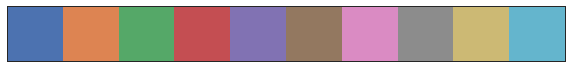

In [22]:
pal = sns.color_palette()
sns.palplot(pal)

In [23]:
main_df.Pair.unique()

array(['P00', 'P01', 'P02', 'P03', 'P04', 'P05', 'P06', 'P07', 'P08',
       'P09', 'P10', 'P11', 'P12', 'P13', 'P14', 'P15', 'P16', 'P17',
       'P18', 'P19', 'P20', 'P21', 'P22', 'P23', 'P24', 'P25', 'P26',
       'P27', 'P28', 'P29', 'P30', 'P31', 'P32', 'P33', 'P34', 'P35',
       'P36', 'P37', 'P38', 'P40', 'P41', 'P42', 'P43', 'P44', 'P45',
       'P46', 'P47', 'P48', 'P49', 'P50', 'P51', 'P53', 'P54', 'P55',
       'P56', 'P57', 'P58', 'P59', 'P60', 'P61', 'P62'], dtype=object)